In [1]:
from pathlib import Path

import h5py
import matplotlib.pyplot as plt

from plot_utils import plot_results

In [2]:
# Names of algorithms to plot for training and finetuning
training_alg_names = ["Base", "Ind-MATE", "Cen-MATE", "Mix-MATE"]
finetuning_alg_names = ["Scratch", "Fine-tune", "Ind-MATE", "Cen-MATE", "Mix-MATE"]

# hierarchy of tasks by 
# environment --> training task --> finetuning task
plot_tasks = {
    "rware": {
        "tiny-2ag": ["small-2ag", "corridor-2ag"],
        "tiny-4ag": ["small-4ag", "corridor-4ag"],
        "wide": ["wide-sides"],
        "wide-sides": ["wide"],
    },
    "mpe": {
        "zone-spread-v4": ["penalty-spread-v1", "penalty-spread-v2"],
    },
    "bpush": {
        "small-2ag": ["medium-2ag", "large-2ag", "small-pen-2ag", "medium-pen-2ag"]
    },
    "lbf": {
        "8x8-2p-2f": ["10x10-2p-2f-coop", "15x15-2p-4f", "15x15-2p-2f-pen"],
        "8x8-4p-4f": ["10x10-4p-2f-coop", "15x15-4p-6f", "15x15-4p-4f-pen"],
    },
}

# Define manual y-limits for plots of each task
ylims_tasks = {
    "rware": {
        # 'tiny-2ag':
        # 'tiny-4ag':
        # 'small-2ag':
        # 'small-4ag':
        # 'corridor-2ag':
        # 'corridor-4ag':
        # 'wide':
        # 'wide-sides':
    },
    "mpe": {
        "zone-spread-v4": (-160, -95),
        "penalty-spread-v1": (-266, -254),
        # 'penalty-spread-v2': (-2025, -2010),
    },
    "bpush": {
        # 'small-2ag':
        # 'medium-2ag':
        # 'large-2ag':
        # 'small-pen-2ag':
        # 'medium-pen-2ag':
    },
    "lbf": {
        # '8x8-2p-2f':
        # '8x8-4p-4f':
        # '10x10-2p-2f-coop':
        # '10x10-4p-2f-coop':
        # '15x15-2p-4f':
        # '15x15-4p-6f':
        # '15x15-2p-2f-pen':
        "15x15-4p-4f-pen": (-0.5, 0.5),
    },
}

In [5]:
data_dir = Path("data")
assert data_dir.exists() and data_dir.is_dir(), f"Data directory {data_dir} does not exist"


def load_aggregate_returns_data(data_dir, env, task, mode, alg_names):
    task = task.lower().replace("-", "_")
    data_path = data_dir / f"{env}/{mode}/returns/{task}.h5"
    assert data_path.exists() and data_path.is_file(), f"Data file {data_path} does not exist"

    aggregate_task_data = {}
    with h5py.File(data_path, "r") as f:
        for alg_name in alg_names:
            alg_name = alg_name.lower().replace("-", "_")
            assert alg_name in f, f"Algorithm {alg_name} not found in {data_path}"
            x_values = f[alg_name]["aggregate_x"][:]
            y_aggs = f[alg_name]["aggregate_y"][:]
            ci_aggs = f[alg_name]["aggregate_ci"][:]
            aggregate_task_data[alg_name] = (x_values, y_aggs, ci_aggs)
    return aggregate_task_data


def load_and_plot_task(data_dir, env, task, mode, alg_names, ylims=None, save_path=None):
    aggregate_data = load_aggregate_returns_data(data_dir, env, task, mode, alg_names)

    plot_results(
        aggregate_data,
        x_label="Timesteps",
        y_label="Episode Returns",
        title=f"{env} - {task} ({mode})",
        y_lims=ylims,
        save_path=save_path,
    )

Plot tiny-2ag in rware...


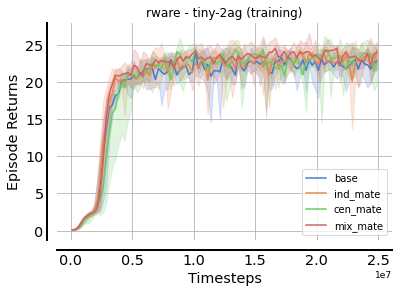

Plot tiny-4ag in rware...


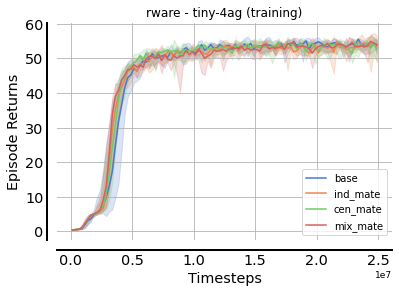

Plot wide in rware...


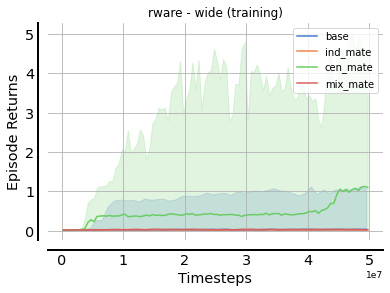

Plot wide-sides in rware...


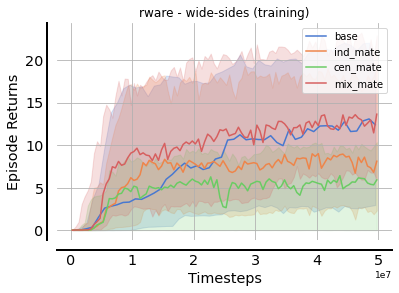

Plot zone-spread-v4 in mpe...


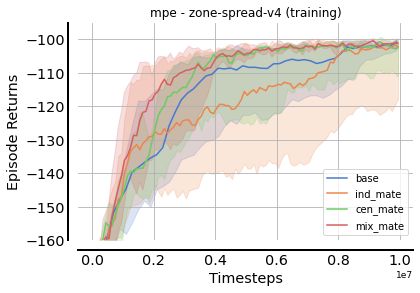

Plot small-2ag in bpush...


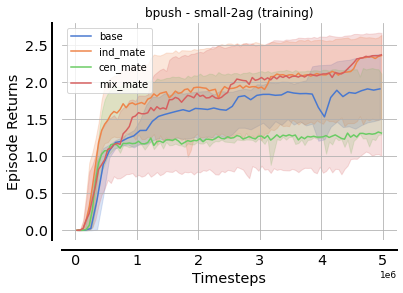

Plot 8x8-2p-2f in lbf...


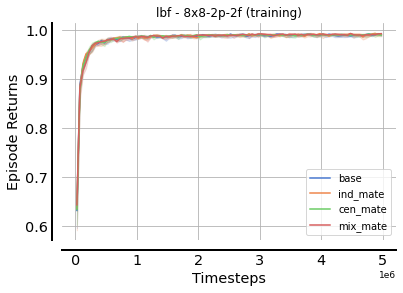

Plot 8x8-4p-4f in lbf...


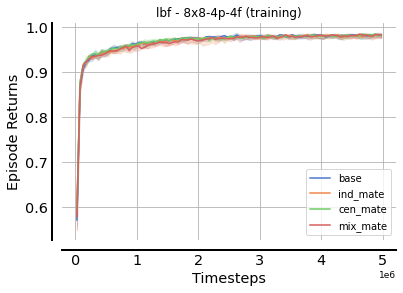

In [6]:
# plot training runs
for env, task_dict in plot_tasks.items():
    train_tasks = list(task_dict.keys())
    for train_task in train_tasks:
        print(f"Plot {train_task} in {env}...")
        if train_task in ylims_tasks[env]:
            ylims = ylims_tasks[env][train_task]
        else:
            ylims = None
        load_and_plot_task(data_dir, env, train_task, "training", training_alg_names, ylims=ylims)
        plt.show()

Plot tiny-2ag --> small-2ag in rware...


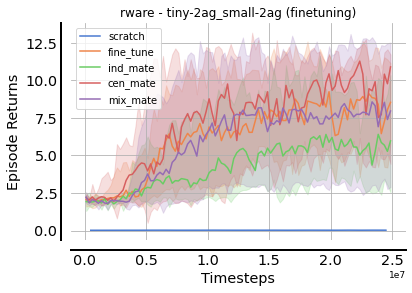

Plot tiny-2ag --> corridor-2ag in rware...


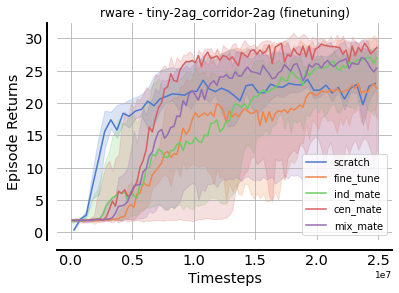

Plot tiny-4ag --> small-4ag in rware...


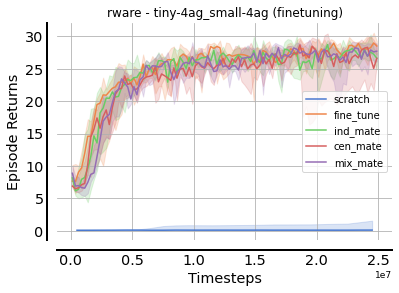

Plot tiny-4ag --> corridor-4ag in rware...


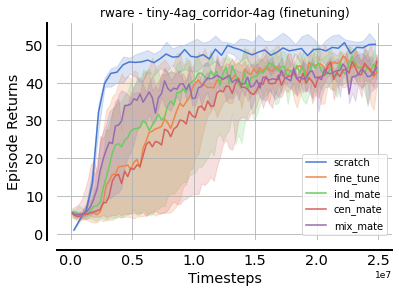

Plot wide --> wide-sides in rware...


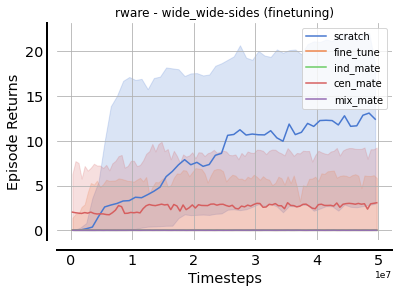

Plot wide-sides --> wide in rware...


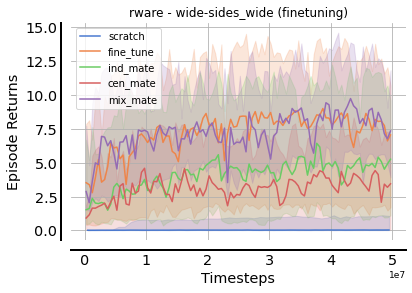

Plot zone-spread-v4 --> penalty-spread-v1 in mpe...


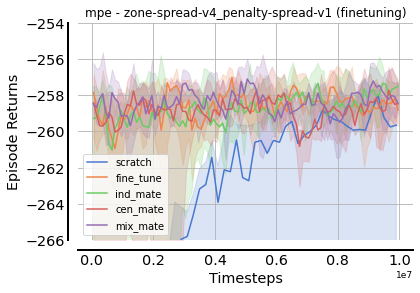

Plot zone-spread-v4 --> penalty-spread-v2 in mpe...


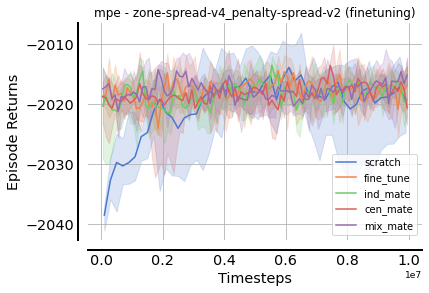

Plot small-2ag --> medium-2ag in bpush...


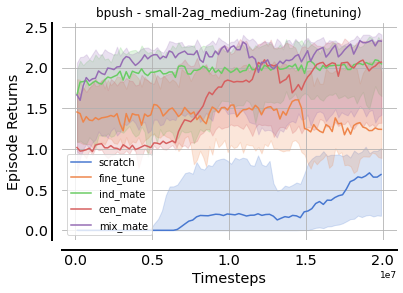

Plot small-2ag --> large-2ag in bpush...


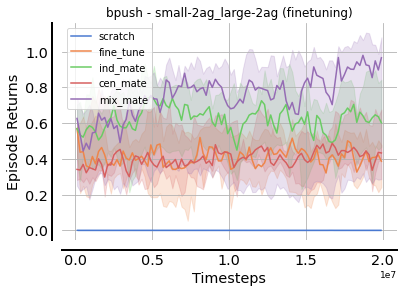

Plot small-2ag --> small-pen-2ag in bpush...


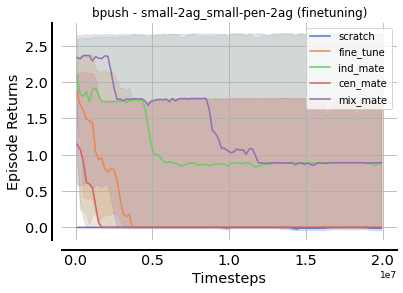

Plot small-2ag --> medium-pen-2ag in bpush...


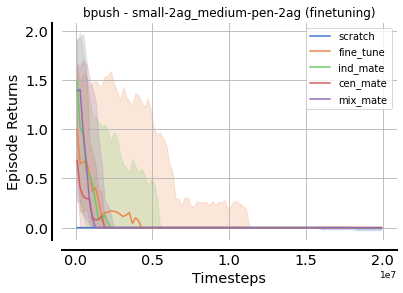

Plot 8x8-2p-2f --> 10x10-2p-2f-coop in lbf...


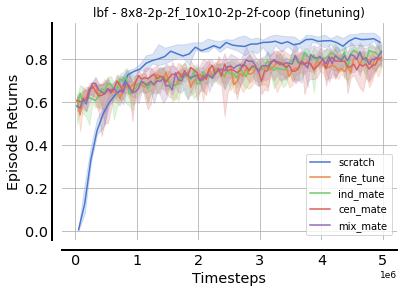

Plot 8x8-2p-2f --> 15x15-2p-4f in lbf...


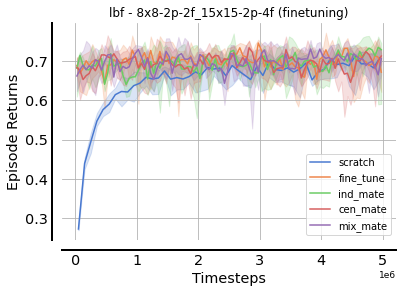

Plot 8x8-2p-2f --> 15x15-2p-2f-pen in lbf...


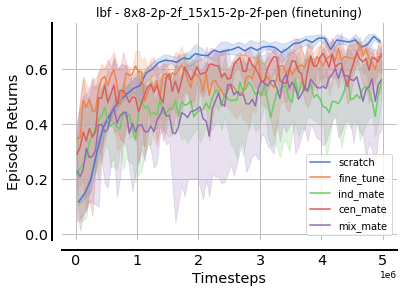

Plot 8x8-4p-4f --> 10x10-4p-2f-coop in lbf...


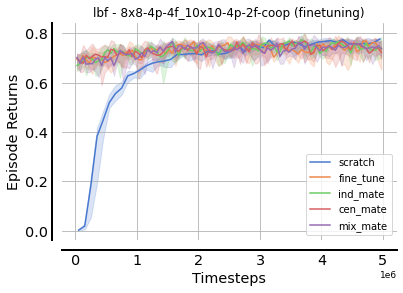

Plot 8x8-4p-4f --> 15x15-4p-6f in lbf...


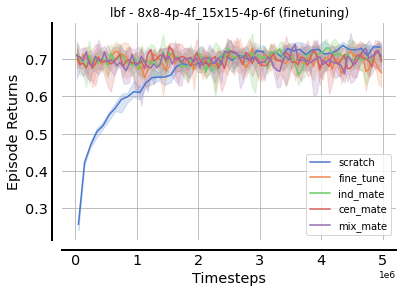

Plot 8x8-4p-4f --> 15x15-4p-4f-pen in lbf...


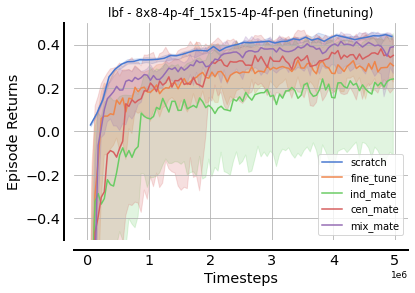

In [7]:
# plot finetuning runs
for env, task_dict in plot_tasks.items():
    for train_task, finetune_tasks in task_dict.items():
        for finetune_task in finetune_tasks:
            print(f"Plot {train_task} --> {finetune_task} in {env}...")
            if finetune_task in ylims_tasks[env]:
                ylims = ylims_tasks[env][finetune_task]
            else:
                ylims = None
            task = f"{train_task}_{finetune_task}"
            load_and_plot_task(data_dir, env, task, "finetuning", finetuning_alg_names, ylims=ylims)
            plt.show()